In [1]:
# https://data.humdata.org/dataset/kontur-population-dataset-3km
# We are in Google maps global Mercator EPSG:900913

import fiona
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import math

myListGeometry = []
myListPopulation = []
# No need to pass "layer='etc'" if there's only one layer...ASK FOR THIS FILE
with fiona.open("Population/kontur_population_20231101_r6.gpkg", layer='population') as layer:
    for feature in layer:
        myListGeometry.append(feature['geometry']['coordinates'])
        myListPopulation.append(feature['properties']['population'])
        
def epsg_4326_to_900913(lon, lat):
    x = lon * 20037508.34 / 180
    y = (math.log(math.tan((90 + lat) * math.pi / 360)) / (math.pi / 180)) * (20037508.34 / 180)
    return x, y

def epsg_900913_to_4326(x, y):
    lon = x * 180 / 20037508.34
    lat = (360 / math.pi) * math.atan(math.exp(y * math.pi / 20037508.34)) - 90
    return lon, lat

def findpointsSGRSradius(lon, lat, sgrsLimit=30):
    d = sgrsLimit # km
    N = 360 

    # generate points
    circlePointLat = []
    circlePointLon = []
    for k in range(N):

        origin = geopy.Point(lat, lon)
        destination = geodesic(kilometers=d).destination(origin, k)

        lat2, lon2 = destination.latitude, destination.longitude
        
        # add to list
        circlePointLat.append(lat2)
        circlePointLon.append(lon2)

    return circlePointLat, circlePointLon


# trying to add population grab
def findpointsSGRSradius2(lon, lat, pop, geoList, sgrsLimit=30):
    d = sgrsLimit # km
    N = 360 
#     distStep = sgrsLimit / (sgrsLimit*10)
    distStep = 1 # km steps
    distStepArray = np.arange(distStep, sgrsLimit+distStep, distStep)

    # generate points for plotting
    circlePointLat = []
    circlePointLon = []
    for k in range(N):
        origin = geopy.Point(lat, lon)
        destination = geodesic(kilometers=d).destination(origin, k)
        lat2, lon2 = destination.latitude, destination.longitude
        circlePointLat.append(lat2)
        circlePointLon.append(lon2)
        
    # generate points for summing
    circleMaster = []
    for radiusStep in distStepArray:
        circlePointLat_holder = []
        circlePointLon_holder = []
        for k in range(N):
            origin = geopy.Point(lat, lon)
            destination = geodesic(kilometers=radiusStep).destination(origin, k)
            lat2_2, lon2_2 = destination.latitude, destination.longitude
            circlePointLat_holder.append(lat2_2)
            circlePointLon_holder.append(lon2_2)
        circleMaster.append([circlePointLat_holder, circlePointLon_holder])

    TrackPolygonsCounted = []
    populationCovered = 0
    for polyg in geoList:
        print("On polygon", geoList.index(polyg), "of", len(geoList))
        myPoly = Polygon(polyg)
        for radCircle in range(len(distStepArray)):
            for rangeOfN in range(N):
                myPoint = [circleMaster[radCircle][1][rangeOfN], circleMaster[radCircle][0][rangeOfN]]
                try:
                    if myPoly.contains(Point(myPoint)) == True:
                        if myPoly not in TrackPolygonsCounted:
                            myIndexOfCell = geoList.index(polyg)
                            populationCovered += pop[myIndexOfCell]
                            TrackPolygonsCounted.append(myPoly)
                    if myPoly.contains(Point(myPoint))[0] == True:
                        if myPoly not in TrackPolygonsCounted:
                            myIndexOfCell = geoList.index(polyg)
                            populationCovered += pop[myIndexOfCell]
                            TrackPolygonsCounted.append(myPoly)
                except:
                    pass


    numOfPolygons  = len(TrackPolygonsCounted)
    
    return circlePointLat, circlePointLon, populationCovered, circleMaster, numOfPolygons, TrackPolygonsCounted


myListGeometryMaster = []
for i in myListGeometry:
    holder = []
    for j in i:
        for k in j:
            try:
                holder.append(epsg_900913_to_4326(k[0], k[1]))
            except:
                pass
#                 # why do we need to do this?
                for f in k:
                    holder.append(epsg_900913_to_4326(f[0], f[1]))
    myListGeometryMaster.append(holder)
myListGeometry = myListGeometryMaster

On polygon 0 of 783
On polygon 1 of 783
On polygon 2 of 783
On polygon 3 of 783
On polygon 4 of 783
On polygon 5 of 783
On polygon 6 of 783
On polygon 7 of 783
On polygon 8 of 783
On polygon 9 of 783
On polygon 10 of 783
On polygon 11 of 783
On polygon 12 of 783
On polygon 13 of 783
On polygon 14 of 783
On polygon 15 of 783
On polygon 16 of 783
On polygon 17 of 783
On polygon 18 of 783
On polygon 19 of 783
On polygon 20 of 783
On polygon 21 of 783
On polygon 22 of 783
On polygon 23 of 783
On polygon 24 of 783
On polygon 25 of 783
On polygon 26 of 783
On polygon 27 of 783
On polygon 28 of 783
On polygon 29 of 783
On polygon 30 of 783
On polygon 31 of 783
On polygon 32 of 783
On polygon 33 of 783
On polygon 34 of 783
On polygon 35 of 783
On polygon 36 of 783
On polygon 37 of 783
On polygon 38 of 783
On polygon 39 of 783
On polygon 40 of 783
On polygon 41 of 783
On polygon 42 of 783
On polygon 43 of 783
On polygon 44 of 783
On polygon 45 of 783
On polygon 46 of 783
On polygon 47 of 783
On

On polygon 378 of 783
On polygon 379 of 783
On polygon 380 of 783
On polygon 381 of 783
On polygon 382 of 783
On polygon 383 of 783
On polygon 384 of 783
On polygon 385 of 783
On polygon 386 of 783
On polygon 387 of 783
On polygon 388 of 783
On polygon 389 of 783
On polygon 390 of 783
On polygon 391 of 783
On polygon 392 of 783
On polygon 393 of 783
On polygon 394 of 783
On polygon 395 of 783
On polygon 396 of 783
On polygon 397 of 783
On polygon 398 of 783
On polygon 399 of 783
On polygon 400 of 783
On polygon 401 of 783
On polygon 402 of 783
On polygon 403 of 783
On polygon 404 of 783
On polygon 405 of 783
On polygon 406 of 783
On polygon 407 of 783
On polygon 408 of 783
On polygon 409 of 783
On polygon 410 of 783
On polygon 411 of 783
On polygon 412 of 783
On polygon 413 of 783
On polygon 414 of 783
On polygon 415 of 783
On polygon 416 of 783
On polygon 417 of 783
On polygon 418 of 783
On polygon 419 of 783
On polygon 420 of 783
On polygon 421 of 783
On polygon 422 of 783
On polygon

On polygon 751 of 783
On polygon 752 of 783
On polygon 753 of 783
On polygon 754 of 783
On polygon 755 of 783
On polygon 756 of 783
On polygon 757 of 783
On polygon 758 of 783
On polygon 759 of 783
On polygon 760 of 783
On polygon 761 of 783
On polygon 762 of 783
On polygon 763 of 783
On polygon 764 of 783
On polygon 765 of 783
On polygon 766 of 783
On polygon 767 of 783
On polygon 768 of 783
On polygon 769 of 783
On polygon 770 of 783
On polygon 771 of 783
On polygon 772 of 783
On polygon 773 of 783
On polygon 774 of 783
On polygon 775 of 783
On polygon 776 of 783
On polygon 777 of 783
On polygon 778 of 783
On polygon 779 of 783
On polygon 780 of 783
On polygon 781 of 783
On polygon 782 of 783


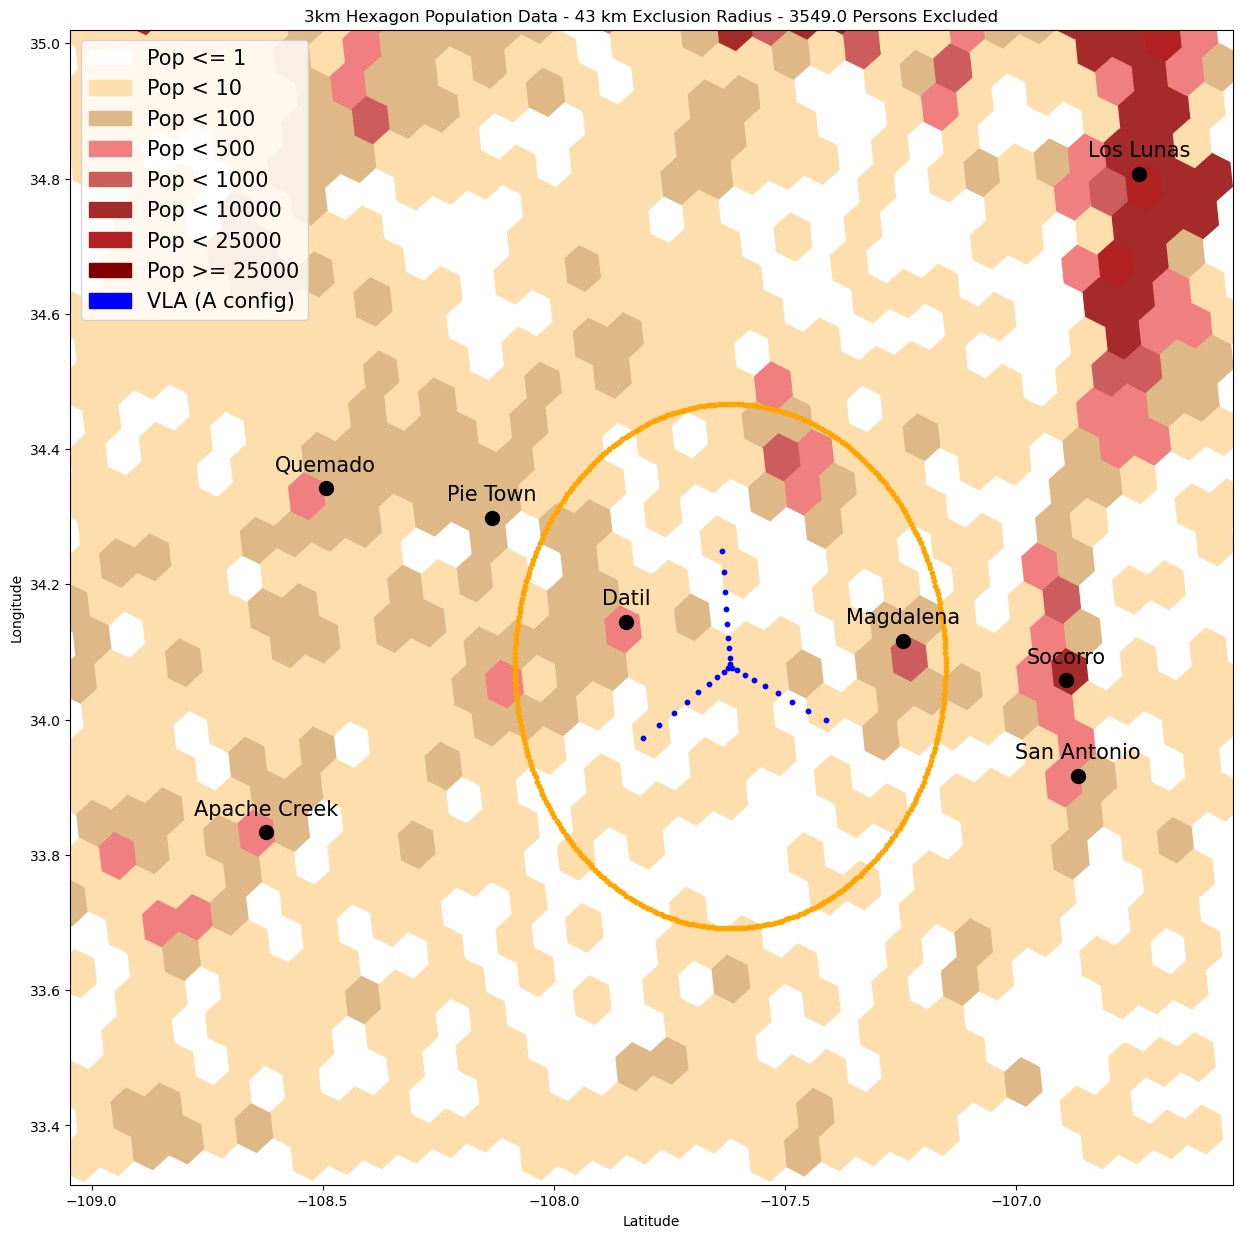

In [2]:
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
from matplotlib.colors import to_rgba
from geopy.geocoders import Nominatim
import geopy.distance
import geopy
from geopy.distance import geodesic
import sys


#################
#################
plotVLA = True # change to False if you want NRQZ/GBO
plotRad = True
plotWithGoogleScreenshot = False # if False, it will still plot major cities that are defined
getPopulationInRad = True
useThisRad = 43
#################
#################

if plotVLA == True:
    # VLA
    minLat = -109.04604
    maxLat = -106.53129
    minLon = 33.31241
    maxLon = 35.02007
else:
    # NRQZ
    minLat = -80.49977778
    maxLat = -78.49972222
    minLon = 37.50011111
    maxLon = 39.25011111


myBox = Polygon([[minLat, maxLon], [maxLat, maxLon], [maxLat, minLon], [minLat, minLon]])

myListGeometryMasked = []
myListPopulationMasked = []
for i in range(len(myListGeometry)):
    # just grabbing first point for simplicity...can expand search radius
    try:
        if myBox.contains(Point(myListGeometry[i][0])) == True:
            myListGeometryMasked.append(myListGeometry[i])
            myListPopulationMasked.append(myListPopulation[i])
        if myBox.contains(Point(myListGeometry[i][0]))[0] == True:
            myListGeometryMasked.append(myListGeometry[i])
            myListPopulationMasked.append(myListPopulation[i])
    except:
        pass

#################
#################

# make own heatmap?
colors= []

scaleList = [10, 100, 500, 1000, 10000, 25000]
colorList = ["navajowhite", "burlywood", "lightcoral", "indianred", "brown", "firebrick", "maroon"]

for pop in myListPopulationMasked:
    if pop < scaleList[0]:
        colors.append(colorList[0])
    elif pop < scaleList[1]:
        colors.append(colorList[1])
    elif pop < scaleList[2]:
        colors.append(colorList[2])
    elif pop < scaleList[3]:
        colors.append(colorList[3])
    elif pop < scaleList[4]:
        colors.append(colorList[4])
    elif pop < scaleList[5]:
        colors.append(colorList[5])
    else:
        colors.append(colorList[6])
        
#################
#################
# Can plot at end of notebook if confident in flow
#################
#################

fig,ax = plt.subplots(1)
fig.set_figheight(15)
fig.set_figwidth(15)

patches = []
shading = 0.2

for pol in range(len(myListGeometryMasked)):
    polygon = Polygon(myListGeometryMasked[pol], closed=True, zorder=2)
    patches.append(polygon)

collection = PatchCollection(patches)

ax.add_collection(collection)

collection.set_color(colors)

patch0 = mpatches.Patch(color='White', label='Pop <= 1')
patch1 = mpatches.Patch(color=colorList[0], label=f'Pop < {scaleList[0]}')
patch2 = mpatches.Patch(color=colorList[1], label=f'Pop < {scaleList[1]}')
patch3 = mpatches.Patch(color=colorList[2], label=f'Pop < {scaleList[2]}')
patch4 = mpatches.Patch(color=colorList[3], label=f'Pop < {scaleList[3]}')
patch5 = mpatches.Patch(color=colorList[4], label=f'Pop < {scaleList[4]}')
patch6 = mpatches.Patch(color=colorList[5], label=f'Pop < {scaleList[5]}')
patch7 = mpatches.Patch(color=colorList[6], label=f'Pop >= {scaleList[5]}')
if plotVLA==True:
    patch8 = mpatches.Patch(color='blue', label='VLA (A config)')
else:
    patch8 = mpatches.Patch(color='blue', label='GBT')
    
if plotVLA==True:
    ax.legend(handles=[patch0, patch1, patch2, patch3, patch4, patch5, patch6, patch7, patch8], loc=2, prop={'size': 15})
else:
    ax.legend(handles=[patch0, patch1, patch2, patch3, patch4, patch5, patch6, patch7, patch8], loc=1, prop={'size': 15})
    
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")

if plotVLA==True:
    myData = pd.read_excel(r"2023.12.13-VLA Antenna Locations.xlsx")
    myDataVLA = myData[myData["Telescope"] == "VLA"]
    plt.scatter(myDataVLA["Longitude"],myDataVLA["Latitude"], c='Blue', label='VLA (A config)', s=10)
else:
    plt.scatter(-79.8398333330, 38.4331111110, c="Blue", marker="X",label="GBT", s=75)


if plotWithGoogleScreenshot == True:
    # Read the image
    if plotVLA==True:
        image = mpimg.imread("GoogleScreenshots/VLA Area.png")
        ax.imshow(image, extent=(-109.04604, -106.53129, 33.31241, 35.02007), alpha=0.4, zorder=1)
        
    else:
        image = mpimg.imread("GoogleScreenshots/NRQZ Screenshot.PNG")
        ax.imshow(image, extent=(-80.49977778, -78.49972222, 37.50011111, 39.25011111), alpha=0.4, zorder=1)
else:
    if plotVLA==True:
        x = [-106.89150824617755, -106.86717366004216, -107.2439826307748, -107.84304014953184, -108.13479358957063, -108.49323582942075, -108.62247584139254, -106.73343616575785]
        y = [34.05843887120238, 33.917337374440656, 34.11678698509371, 34.14498876095551, 34.29841030334233, 34.341938177301046, 33.833553595844414, 34.80617289276679]
        n = ['Socorro', 'San Antonio', 'Magdalena', 'Datil', 'Pie Town', 'Quemado', 'Apache Creek', 'Los Lunas']
        ax.scatter(x, y,c="Black", marker="o", s=100)
        for i, txt in enumerate(n):
            ax.annotate(txt, (x[i], y[i]*1.001), fontsize=15, ha='center', va='center')
    else:
        x = [-79.84755822247746, -80.23207902958168, -79.46498869555761, -79.07174360774749, -78.86909971030617, -79.44285722600951, -78.50782665898747, -79.99745605445332, -79.8314201615173, -80.44537589401295]
        y = [38.92622538160522, 38.99394223002204, 39.12882235724037, 38.14956039497096, 38.44952006697458, 37.784181032074734, 38.029427546508686, 38.413220273177394, 37.999425402719005, 37.80202273639629]
        n = ['Elkins', 'Buckhannon', 'Davis', 'Staunton', 'Harrisonburg', 'Lexington', 'Charlottesville', 'Snowshoe', 'Hot Springs', 'Lewisburg']
        ax.scatter(x, y,c="Black", marker="o", s=100)
        for i, txt in enumerate(n):
            ax.annotate(txt, (x[i], y[i]*1.001), fontsize=15, ha='center', va='center')
    
if plotRad == True:
    if plotVLA==True:
        SGRSrad = findpointsSGRSradius(-107.61810676530001, 34.079161988380406, sgrsLimit=useThisRad)
        plt.scatter(SGRSrad[1], SGRSrad[0], s=10, c='orange', label=f"{useThisRad} km around VLA")
    else:
        SGRSrad = findpointsSGRSradius(-79.8398333330, 38.4331111110, sgrsLimit=useThisRad)
        plt.scatter(SGRSrad[1], SGRSrad[0], s=10, c='orange', label=f"{useThisRad} km around GBT")

if plotVLA==True:
    ax.set_ylim(33.31241, 35.02007)
    ax.set_xlim(-109.04604, -106.53129)
else:
    ax.set_xlim(-80.49977778, -78.49972222)
    ax.set_ylim(37.50011111, 39.25011111)

if getPopulationInRad == True:
    if plotVLA == True:
        circlePointLat, circlePointLon, populationCovered, circleMaster, numOfPolygons, TrackPolygonsCounted = findpointsSGRSradius2(-107.61810676530001, 34.079161988380406, myListPopulationMasked, myListGeometryMasked, sgrsLimit=useThisRad)
    else:
        circlePointLat, circlePointLon, populationCovered, circleMaster, numOfPolygons, TrackPolygonsCounted = findpointsSGRSradius2(-79.8398333330, 38.4331111110, myListPopulationMasked, myListGeometryMasked, sgrsLimit=useThisRad)

ax.set_title(f"3km Hexagon Population Data - {useThisRad} km Exclusion Radius - {populationCovered} Persons Excluded")

ax.autoscale_view()

if plotWithGoogleScreenshot == True:
    if plotVLA==True:
        if getPopulationInRad == True:
            plt.savefig(f"\\Outputs\\PopulationDensity\\VLA_Population_{useThisRad}_kmExclusion_{populationCovered}_persons.pdf", bbox_inches = 'tight')
        else:
            if plotRad == True:
                plt.savefig(f"\\Outputs\\PopulationDensity\\VLA_Population_{useThisRad}_kmExclusion.pdf", bbox_inches = 'tight')
            else:
                plt.savefig(f"\\Outputs\\PopulationDensity\\VLA_Population.pdf", bbox_inches = 'tight')
    else:
        if getPopulationInRad == True:
            plt.savefig(f"\\Outputs\\PopulationDensity\\NRQZ_Population_{useThisRad}_kmExclusion_{populationCovered}_persons.pdf", bbox_inches = 'tight')
        else:
            if plotRad == True:
                plt.savefig(f"\\Outputs\\PopulationDensity\\NRQZ_Population_{useThisRad}_kmExclusion.pdf", bbox_inches = 'tight')
            else:
                plt.savefig(f"\\Outputs\\PopulationDensity\\NRQZ_Population.pdf", bbox_inches = 'tight')
else:
    if plotVLA==True:
        if getPopulationInRad == True:
            plt.savefig(f"\\Outputs\\PopulationDensity\\VLA_Population_{useThisRad}_kmExclusion_{populationCovered}_persons.pdf", bbox_inches = 'tight')
        else:
            if plotRad == True:
                plt.savefig(f"\\Outputs\\PopulationDensity\\VLA_Population_{useThisRad}_kmExclusion.pdf", bbox_inches = 'tight')
            else:
                plt.savefig(f"\\Outputs\\PopulationDensity\\VLA_Population.pdf", bbox_inches = 'tight')
    else:
        if getPopulationInRad == True:
            plt.savefig(f"\\Outputs\\PopulationDensity\\NRQZ_Population_{useThisRad}_kmExclusion_{populationCovered}_persons.pdf", bbox_inches = 'tight')
        else:
            if plotRad == True:
                plt.savefig(f"\\Outputs\\PopulationDensity\\NRQZ_Population_{useThisRad}_kmExclusion.pdf", bbox_inches = 'tight')
            else:
                plt.savefig(f"\\Outputs\\PopulationDensity\\NRQZ_Population.pdf", bbox_inches = 'tight')

In [6]:
print(SGRSrad[1][0])
print(SGRSrad[0][0])

-107.61810676530001
34.466803165905354


# General analysis and result confirmation

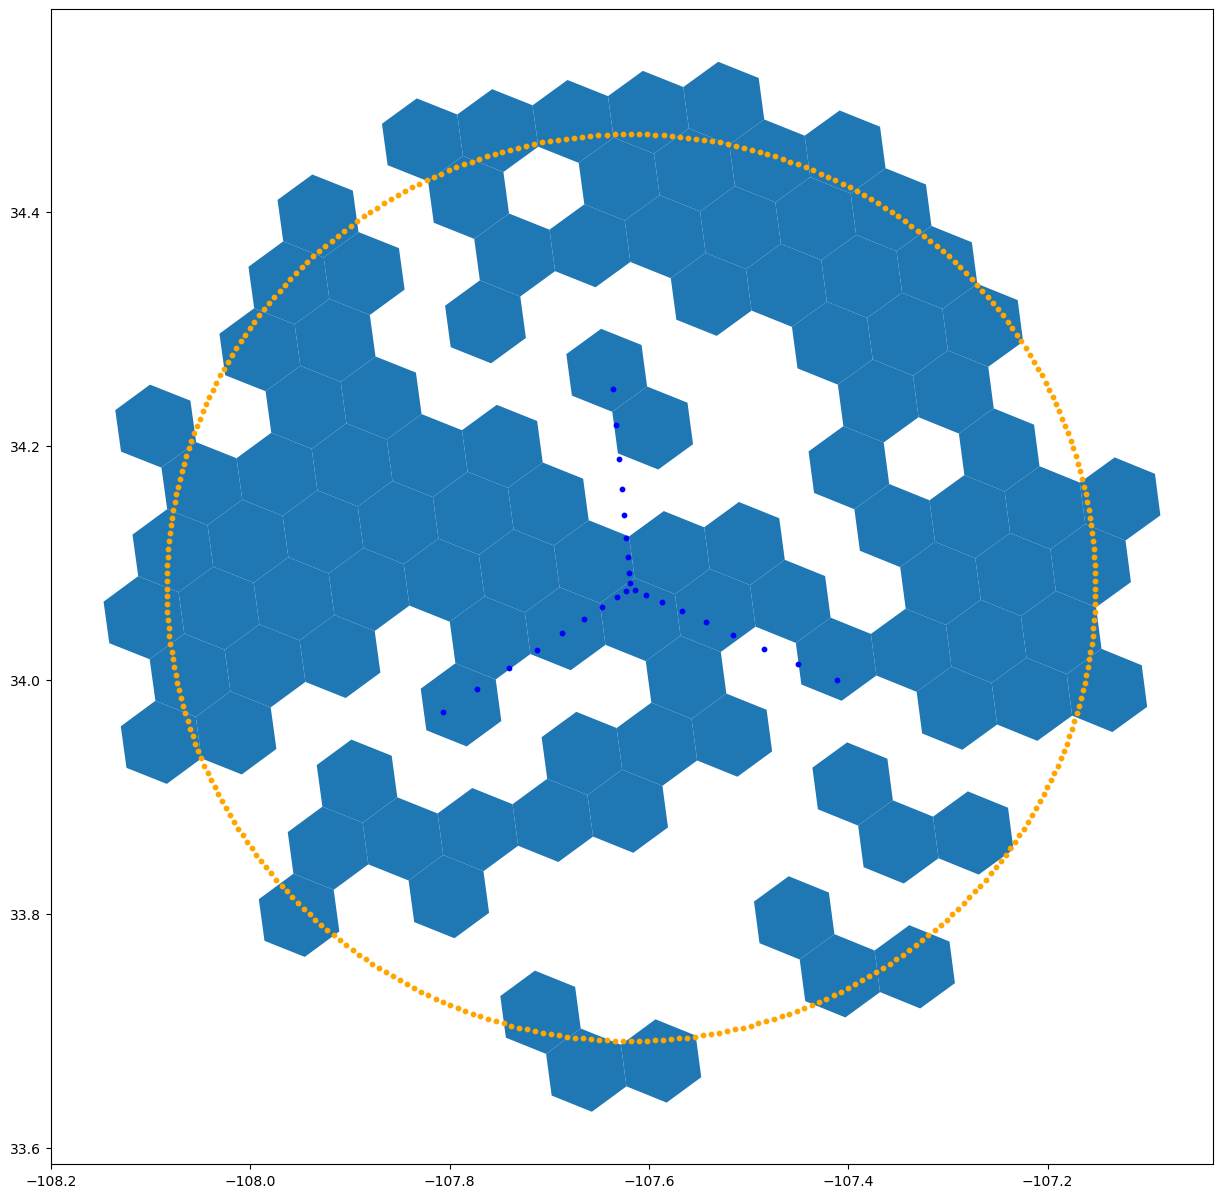

In [3]:
fig,ax = plt.subplots(1)
fig.set_figheight(15)
fig.set_figwidth(15)

collection = PatchCollection(TrackPolygonsCounted)
if plotVLA==True:
    ax.add_collection(collection)
    plt.scatter(myDataVLA["Longitude"],myDataVLA["Latitude"], c='Blue', label='VLA (A config)', s=10)
    SGRSrad = findpointsSGRSradius(-107.61810676530001, 34.079161988380406, sgrsLimit=useThisRad)
    plt.scatter(SGRSrad[1], SGRSrad[0], s=10, c='orange', label=f"{useThisRad} km around GBT")
    ax.autoscale_view()
else:
    ax.add_collection(collection)
    plt.scatter(-79.8398333330, 38.4331111110, c="Red", marker="X",label="GBT", s=75)
    SGRSrad = findpointsSGRSradius(-79.8398333330, 38.4331111110, sgrsLimit=useThisRad)
    plt.scatter(SGRSrad[1], SGRSrad[0], s=10, c='orange', label=f"{useThisRad} km around GBT")

    ax.autoscale_view()
